## Final Project Submission

Please fill out:
* Student name: grace rotich
* Student pace:Hybrid
* Scheduled project review date/time: 
* Instructor name: Nikita/Diana
* Blog post URL:


                     
## BUSINESS UNDERSTANDING 

Microsoft, a prominent technology company, has yet to explore movie production despite its success in software, services, and devices. This project aims to provide stakeholders with real-time analysis to consider before entering the movie production space.


 Objectives:

- Determine which movie studios produce the highest number of movies and their market dominance.
Identify the most successful genres within the top-performing movie studios to guide Microsoft's production focus.

- Analyze the correlation between total gross revenue and leading studios to inform Microsoft's strategic decisions.

- identify top-performing directors based on their track record of successful movies, providing insights for potential collaborations or acquisitions.


           

####

## DATA UNDERSTANDING 
Data Sources

The project gathers data from various platforms, notably Box Office Mojo, IMDB, and Rotten Tomatoes. Box Office Mojo supplies extensive information on box office performances, including revenue, budgets, and release details. IMDB serves as a comprehensive source for movie-related information such as ratings, cast, crew, and plot summaries. Rotten Tomatoes aggregates reviews from critics and audience members, offering insights into movie reception and audience scores.
Data required in this project is sourced from the sites below.

Justification of Features

Features such as box office revenue, budget, ratings from IMDB and Rotten Tomatoes, and audience scores are included in the analysis because they are key indicators of a movie's success and popularity. These features are relevant for understanding factors that contribute to a movie's performance at the box office and its reception by audiences and critics.



1 https://www.imdb.com/
 
2 https://www.boxofficemojo.com/date/?ref_=bo_nb_shs_tab

3 https://www.rottentomatoes.com/

4 https://www.themoviedb.org/
          
5 https://www.the-numbers.com/'


     ERD diagram of IMDB 

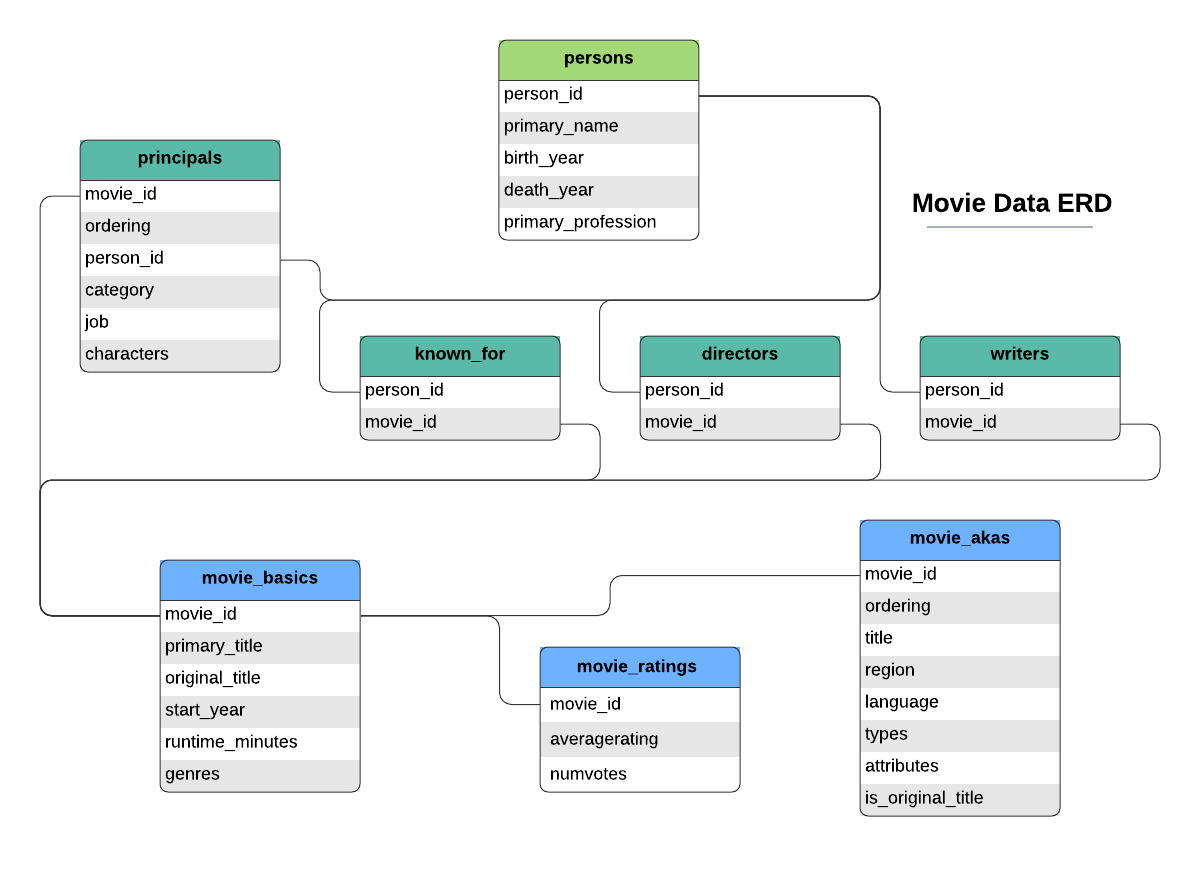




## DATA PREPARATION

The methodology seeks to show the data cleaning and analysis procedures in this project.


In [184]:
#Import relevant libraries and connect to SQlite Database
import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt



In [185]:
#Read  movie_gross data and put it in a dataframe defined gross_data
gross_data=pd.read_csv('zippedData/bom.movie_gross.csv.gz')


In [186]:
#Read and extract imdb dzip file  into destination directory
import zipfile
# Specify the path to the zip file
zip_file_path = 'zippedData\im.db.zip'
# Open the zip file for reading
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#Extract the files to a directory
  zip_ref.extractall('destination_directory') 


In [187]:
#connect to the Database in destination_directory

# Specify the path to the SQLite database file
db_file_path = 'destination_directory/im.db'

# Connect destination_directoryto the SQLite database
connection = sqlite3.connect(db_file_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()



   Data Cleaning 

This process entails cleaning the movie gross data that is crucial in understanding which companies are doing well in relation to the their gross  income and conduct some analysis as well


In [188]:
# Display data from BOM that shows the bom.movie_gross proceeds 
gross_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [189]:
# Clean the data :Replace the null values in foreign gross and domestic_grosss columns
# Check 'foreign_gross'column  Before Modification
before_foreign_nulls = gross_data['foreign_gross'].isnull().sum()
before_domestic_nulls = gross_data['domestic_gross'].isnull().sum()

#Replace the null values
gross_data['foreign_gross'].fillna(0, inplace=True)
gross_data['domestic_gross'].fillna(0, inplace=True)

# Check 'foreign_gross'column  After Modification
after_foreign_nulls = gross_data['foreign_gross'].isnull().sum()
after_domestic_nulls = gross_data['domestic_gross'].isnull().sum()



In [190]:
#show the datatypes in the different columns
print(gross_data.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [191]:
#Change the foreign_gross datatype to float 
# Check the current data type of 'foreign_gross' column before modification
before_dtype = gross_data['foreign_gross'].dtype

# Run the Code
gross_data.replace(',','', regex=True, inplace=True)
gross_data['foreign_gross']=gross_data['foreign_gross'].astype(float)

#check the data type of 'foreign_gross' column after modification
after_dtype = gross_data['foreign_gross'].dtype
after_dtype

#assert the changes made
assert after_dtype == float, "The data type of 'foreign_gross' column was not changed to float."



 ## Data Exploration
Exploratory Data Analysis of BOM Data



In [192]:
#To resolve the type error that comes about when adding the domestic and foreign gross values
# Convert any non-numeric values to NaN in 'domestic_gross' and 'foreign_gross' columns
gross_data['domestic_gross'] = pd.to_numeric(gross_data['domestic_gross'], errors='coerce')
gross_data['foreign_gross'] = pd.to_numeric(gross_data['foreign_gross'], errors='coerce')

# Add a column to show total gross income
gross_data['total_gross'] = gross_data['domestic_gross'] + gross_data['foreign_gross']

# Convert the values in the 'total_gross' column to int64
gross_data['total_gross'] = gross_data['total_gross'].astype('int64')

# Display the 'total_gross' column
print(gross_data['total_gross'])


0       1067000000
1       1025500000
2        960300000
3        828300000
4        752600000
           ...    
3382          6200
3383          4800
3384          2500
3385          2400
3386          1700
Name: total_gross, Length: 3387, dtype: int64


In [193]:
# Determine how many movies each studio has produced
prd_movies =gross_data['studio'].value_counts()
# convert the ouput to a dataframe
df_prd_movies = gross_data['studio'].value_counts()
df_prd_movies = pd.DataFrame(prd_movies)
df_prd_movies = df_prd_movies.reset_index()
df_prd_movies.columns = ['studio_name', 'total_movies_produced']
df_prd_movies

,studio_name,total_movies_produced
0,IFC,166
1,Uni.,147
2,WB,140
3,Fox,136
4,Magn.,136
...,...,...
252,E1,1
253,PI,1
254,ELS,1
255,PalT,1


- The above code indicates that most of the movies are produced by the' IFC' studios followed by Uni
WB,Fox and Magn.
- Our interest is also to find out how this top perfoming studios are doing in terms of the gross they receive.

In [194]:
#group the data using the studios and their total gross
grouped=gross_data.groupby('studio').sum('total_gross')
grouped


,domestic_gross,foreign_gross,year,total_gross
studio,,,,
3D,6100000.0,9900000.0,2010,16000000
A23,164200.0,0.0,4024,164200
A24,324194200.0,238462200.0,98754,562656400
ADC,248200.0,0.0,4032,248200
AF,2142900.0,3500000.0,12080,5642900
...,...,...,...,...
XL,458000.0,0.0,4027,458000
YFG,1100000.0,0.0,2016,1100000
Yash,31631400.0,272825100.0,28194,304456500


In [195]:
# Create a new dataframe by joining the gross_data dataframe with the df_prd_movies dataframe
joined=grouped.join(df_prd_movies.set_index("studio_name"))
joined=joined.drop('year', axis=1)
joined['avg_gross']=joined['total_gross']/joined['total_movies_produced']

# Change data type to integer
joined=joined.astype('int64')

# Sort the new dataframe by avg_gross
joined.sort_values('avg_gross', ascending=False)

,domestic_gross,foreign_gross,total_gross,total_movies_produced,avg_gross
studio,,,,,
HC,2700000,867600000,870300000,1,870300000
P/DW,1682900000,3393600000,5076500000,10,507650000
BV,18419029199,25793854700,44212883898,106,417102678
GrtIndia,20200000,234000000,254200000,1,254200000
WB (NL),3995699999,6339000000,10334699999,45,229659999
...,...,...,...,...,...
BSM,5100,0,5100,1,5100
TAFC,4600,0,4600,1,4600
Hiber,3600,0,3600,1,3600


The code above sorts the dataframe starting with the studio with the highest average gross to that with the lowest average gross.
As per the above analysis most studios have produces less that 10 movies and the BV studio has produced 106 mmovies.
For comprehensive analysis filter the data to obtain studios with more than 50 movies produced in relation to the average gross.

In [196]:
# Create another table showing only the studios that have released 50 or more movies
joined2=joined.drop(joined[joined['total_movies_produced']<50].index)

# Sort the new dataframe by avg_gross
joined2=joined2.sort_values(by='avg_gross', ascending=False)
joined2



,domestic_gross,foreign_gross,total_gross,total_movies_produced,avg_gross
studio,,,,,
BV,18419029199,25793854700,44212883898,106,417102678
Fox,10949499997,20055866599,31005366596,136,227980636
WB,12168046000,18667902998,30835948998,140,220256778
Sony,8459683098,13945354998,22405038096,110,203682164
Uni.,12902393000,16854771191,29757164191,147,202429688
Par.,7685870699,11863384998,19549255697,101,193556987
LGF,4118963400,4482619300,8601582700,103,83510511
Wein.,1540550498,2624085999,4164636497,77,54086188
WGUSA,25394600,2761447000,2786841600,58,48048993


The most financially successful studio is BV, followed by Fox, WB, Sony, and Universal


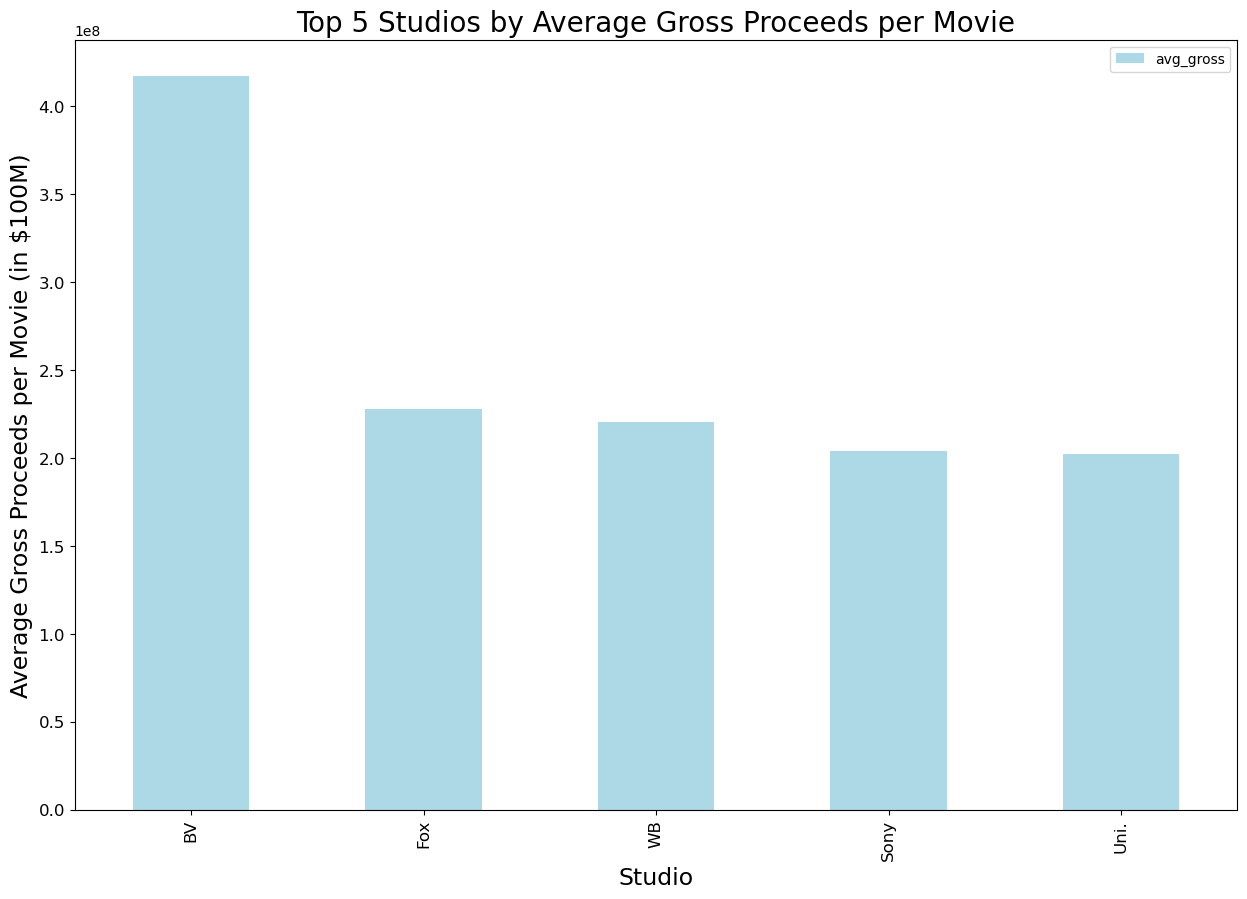

In [197]:
# Visualize the data
# show the top five prominent studios
studioplot= joined2.head().plot(y='avg_gross', fontsize=12, kind='bar', figsize=(15,10), color='lightblue')

# Set axes titles and font size for improved readability 
studioplot.set_title("Top 5 Studios by Average Gross Proceeds per Movie", fontsize=20)
studioplot.set_ylabel("Average Gross Proceeds per Movie (in $100M)", fontsize=17)
studioplot.set_xlabel("Studio", fontsize=17)
print("The most financially successful studio is BV, followed by Fox, WB, Sony, and Universal")

Each bar represents a studio, and its height indicates the average gross proceeds per movie. The studio names are labeled on the x-axis, and the average gross proceeds are displayed on top of each bar.
Based on the analysis ,the top five studios that have both their average gross on  the high as well as the number of their productions are :BV, Fox, WB,Sony and Universal studios.

## 2. Popular Genre in most Successful Movie Studio

Bv Studio is the top perfoming genre among the five top_perming studios.
An analysis on the genre that Bv studio produces oftenly would be crucial in determining the genre that microsoft should focus.
This is because the margin between the average gross of the Bv studio and its closest competitor Fox according to the bar graph is almost(2.0)* $100M.


   Analysis of studios based on the total_gross

In [198]:
# Create a dataframe of movies produced by BV studios, sorted by total_gross in descending order
bv_movies=gross_data[gross_data['studio']=='BV'].sort_values('total_gross', ascending=False)
bv_movies.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1518900000
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1405400000
3080,Black Panther,BV,700100000.0,646900000.0,2018,1347000000
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1332600000
1127,Frozen,BV,400700000.0,875700000.0,2013,1276400000
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1263500000
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1242800000
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1214800000
2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1153300000
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000


 Analysis of the best perfoming movies in the best performing studio using 'bom gross' data

In [199]:
#Outline the top most movies of Bv as a list
top_bv_titles=list(gross_data[gross_data['studio']=='BV'].sort_values('total_gross', ascending=False).head(20)['title'])
top_bv_titles

["Marvel's The Avengers",
 'Avengers: Age of Ultron',
 'Black Panther',
 'Star Wars: The Last Jedi',
 'Frozen',
 'Beauty and the Beast (2017)',
 'Incredibles 2',
 'Iron Man 3',
 'Captain America: Civil War',
 'Toy Story 3',
 'Rogue One: A Star Wars Story',
 'Pirates of the Caribbean: On Stranger Tides',
 'Finding Dory',
 'Alice in Wonderland (2010)',
 'Zootopia',
 'The Jungle Book (2016)',
 'Star Wars: The Force Awakens',
 'Guardians of the Galaxy Vol. 2',
 'Inside Out',
 'Thor: Ragnarok']

Analysis of 'Movie Basics' table in the IMDB database using SQL.

In [200]:
# Use the list of BV movie titles to extract BV's top 20 financially successful movies from IMDB's database
# Look at the IMDB movie_basics table
# Exclude entries with null values
q1=pd.read_sql('''SELECT * FROM movie_basics WHERE primary_title IN ("Marvel's The Avengers",
 'Avengers: Age of Ultron',
 'Black Panther',
 'Star Wars: The Last Jedi',
 'Frozen',
 'Beauty and the Beast (2017)',
 'Incredibles 2',
 'Iron Man 3',
 'Captain America: Civil War',
 'Toy Story 3',
 'Rogue One: A Star Wars Story',
 'Pirates of the Caribbean: On Stranger Tides',
 'Finding Dory',
 'Alice in Wonderland (2010)',
 'Zootopia',
 'The Jungle Book (2016)',
 'Star Wars: The Force Awakens',
 'Guardians of the Galaxy Vol. 2',
 'Inside Out',
 'Thor: Ragnarok')
 AND runtime_minutes IS NOT NULL AND genres IS NOT NULL''',connection)


 Visualization of the top performing genre combinations in the leading studio

In [201]:
# Pass query1 into a dataframe for visualization 
df=pd.DataFrame(q1)

# Create a new sub dataframe that takes the unique genre combinations of BV movies and returns the frequency
bv_genres = df['genres'].value_counts()
df_bv_genres = pd.DataFrame(bv_genres)
df_bv_genres = df_bv_genres.reset_index()
df_bv_genres.columns = ['genres', 'count']
df_bv_genres

,genres,count
0,"Adventure,Animation,Comedy",5
1,"Action,Adventure,Sci-Fi",5
2,"Action,Adventure,Fantasy",2
3,"Action,Adventure,Comedy",2
4,"Adventure,Drama,Sport",1
5,"Fantasy,Romance",1
6,"Crime,Drama",1
7,Documentary,1
8,Family,1
9,"Biography,Documentary,History",1


The movie combinations with the highest counts in the BV studio are (Adventure,Animation,comedy)&(Action,Adventure,Sci-Fi) with a count of 5 on each.

For better understanding the horizontal bar graphs have been used to show the occurrence of the genre combinations.

Text(0.5, 1.0, 'Frequency of Genre Combinations in BV Studios')

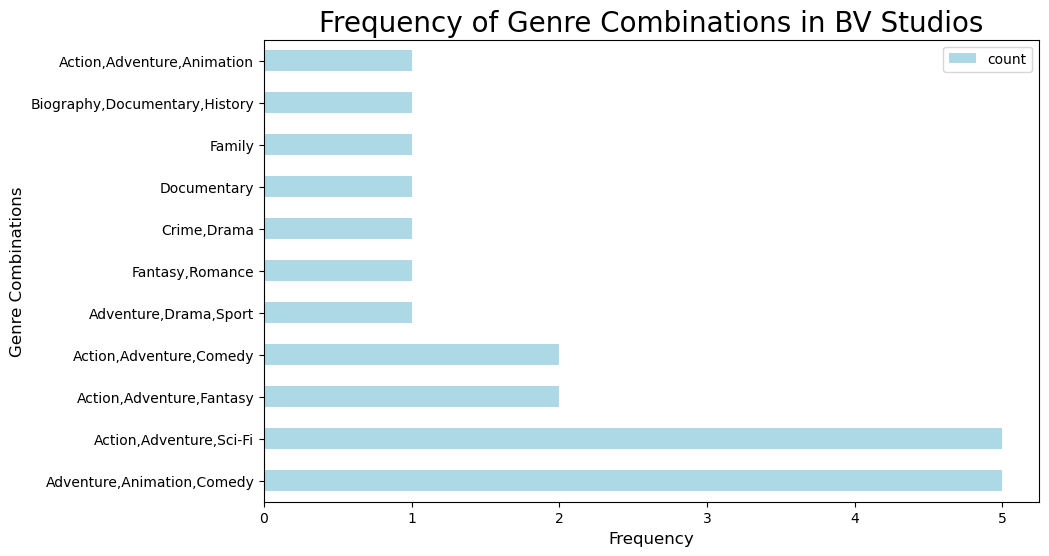

In [202]:
# Visualize the dataframe to determine the most common genre combination for BV's movies highest 20 grossing films
df_bv_genres.plot(x='genres', y='count', kind='barh', figsize=(10,6), color='lightblue')
plt.xlabel('Frequency', size=12)
plt.ylabel('Genre Combinations', size=12)
plt.title("Frequency of Genre Combinations in BV Studios", size=20)

Use of horizontal bar graph to vsisualize the leading 5  Genre Combinations.

Text(0.5, 1.0, 'Frequency of Top 5 Genre Combinations in BV  Highest Grossing Films')

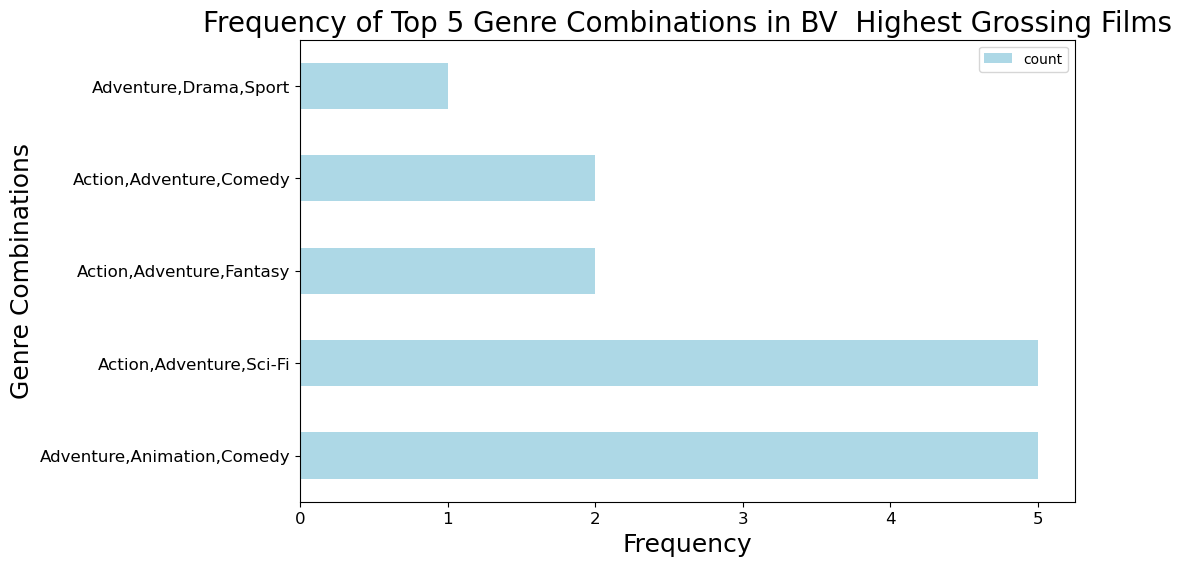

In [203]:
#Visualize the top 5 genre combinations in BV studios
df_bv_genres.head(5).plot(x='genres', y='count', kind='barh', figsize=(10,6), color='lightblue', fontsize=12)
plt.xlabel('Frequency', size=18)
plt.ylabel('Genre Combinations', size=18)
plt.title("Frequency of Top 5 Genre Combinations in BV  Highest Grossing Films", size=20)

In [204]:
# Print conclusion from the graph
print("The most successful 3 genre combinations in movies produced by BV studios are:\n Action/Adventure/Fantasy\n Action/Adventure/SciFi\n Adventure/Animation/Comedy")

The most successful 3 genre combinations in movies produced by BV studios are:
 Action/Adventure/Fantasy
 Action/Adventure/SciFi
 Adventure/Animation/Comedy


## 3. Leading Directors 
- The production team in any film production contribute highly to the performance of the movie.The analysis carried out below will aid Microsoft stakeholders to know which directors to consider in their team.

- Running a multiple join across 'Movie Basics','Directors',and 'Movie ratings' tables will give a better overview of the correlation of the three tables and how this affects the gross.

- Our sample is derived from Bv studio since it is the best performing in terms of its gross income.

In [205]:
# SQL query to pull the directors that were hired for BV Studios' 20 most financially successful films
# Use multiple joins to link the tables ,filter the the result to show the litsed movies 
# Group using the directors names denoted as the the primary_name
# order the result using the average rating 
q2=pd.read_sql("""SELECT p.primary_name, mb.primary_title, mr.averagerating FROM persons p
                    JOIN directors d
                    ON d.person_id=p.person_id
                    JOIN movie_basics mb 
                    ON mb.movie_id=d.movie_id
                    JOIN movie_ratings mr
                    ON mr.movie_id=mb.movie_id
                    WHERE mb.primary_title IN ("Marvel's The Avengers",
                 'Avengers: Age of Ultron',
                 'Black Panther',
                 'Star Wars: The Last Jedi',
                 'Frozen',
                 'Beauty and the Beast (2017)',
                 'Incredibles 2',
                 'Iron Man 3',
                 'Captain America: Civil War',
                 'Toy Story 3',
                 'Rogue One: A Star Wars Story',
                 'Pirates of the Caribbean: On Stranger Tides',
                 'Finding Dory',
                 'Alice in Wonderland (2010)',
                 'Zootopia',
                 'The Jungle Book (2016)',
                 'Star Wars: The Force Awakens',
                 'Guardians of the Galaxy Vol. 2',
                 'Inside Out',
                 'Thor: Ragnarok')
                    GROUP BY primary_name
                    ORDER BY averagerating DESC""", connection)


In [206]:
# Create a data frame for the above query 
df_q2=pd.DataFrame(q2).head(20)
df_q2# Gives the output of the dataframe indicating the top 20movies with highest rating and the directors names

,primary_name,primary_title,averagerating
0,Lee Unkrich,Toy Story 3,8.3
1,Ronnie Del Carmen,Inside Out,8.2
2,Pete Docter,Inside Out,8.2
3,Rich Moore,Zootopia,8.0
4,Jared Bush,Zootopia,8.0
5,Byron Howard,Zootopia,8.0
6,Taika Waititi,Thor: Ragnarok,7.9
7,Joe Russo,Captain America: Civil War,7.8
8,Gareth Edwards,Rogue One: A Star Wars Story,7.8
9,Anthony Russo,Captain America: Civil War,7.8


Visualization of the Performance of the BV studio best rated movies and display the directors


Text(0, 0.5, 'Movie Rating')

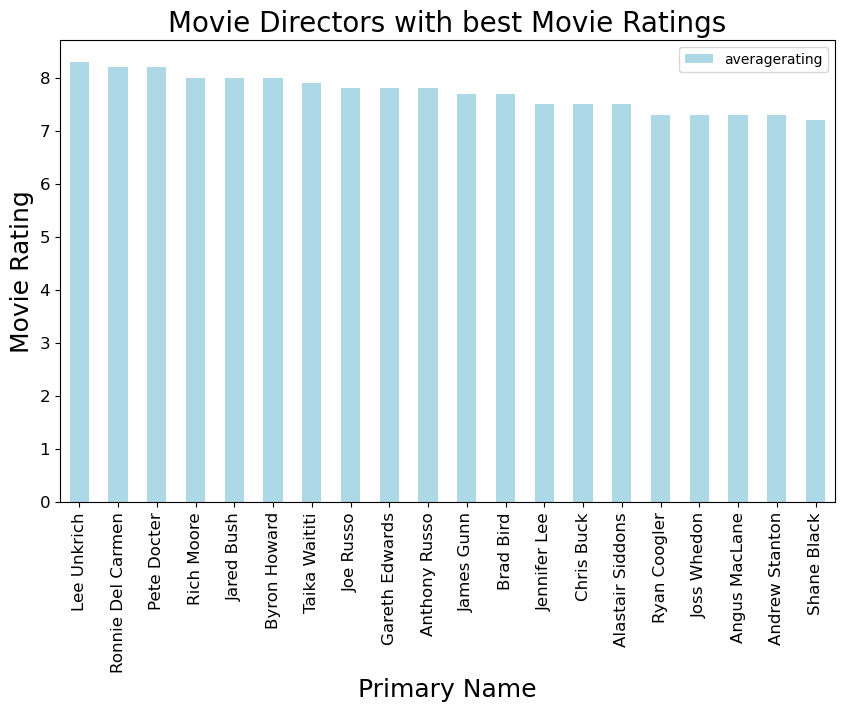

In [207]:
# Visualize the dataframe of directors behind BV's 20 highest grossing films
# Filter to visualize only the directors of movies that received a rating of 7 or higher
ax2=df_q2[df_q2['averagerating']>=7].plot('primary_name', kind='bar', color='lightblue', figsize=(10,6), fontsize=12)
ax2.set_title("Movie Directors with best Movie Ratings",fontsize=20)
ax2.set_xlabel('Primary Name', fontsize=18)
ax2.set_ylabel('Movie Rating', fontsize=18)

###


###

## CONCLUSION & RECOMMENDATIONS

1.Ratings drive decision-making:

Ratings provide valuable feedback on how well a film has received and the overall quality of a film. Positive ratings contribute to positive word-of-mouth driving audience attendance and marketing/promotional materials to attract audiences. Microsoft should endeavour to create films of high quality as positive ratings help establish a studio's credibility and create a loyal audience base. By continuing to monitor audience reactions, scores on platforms like IMDB and other sites, Microsoft can gain insights into what worked well and what could be improved which is invaluable for tailoring future content to better align with audiences.
Microsoft should also keep in mind that the ratings can be skewed by the number of votes and the demographic of audience whom are voting. Ratings are inherently subjective and vary based on the individual e.g. critics may focus on artistic elements but the general audience prioritises entertainment.

2.Create films in the Adventure genre;
 
ideally start with an Adventure, Action and Sci-Fi film: The top 20 grossing films have a combination of genres that include Adventure. Microsoft Movie Studios should identify what their target audience wants and capitalize on the type of content they want to see. As they are a fledging movie studio, not only do audiences find entertainment value in the Adventure genre, these types of films are among the most profitable, so the studios should start by creating films which include this genre to have the best chance of success. Most films are not a single genre only and the most frequent combination of genres is Adventure, Action and Sci-fi in our top grossing films so Microsoft should start with making one of these.

3.Lastly, Microsoft should consider collaborating with or hiring directors like Lee Unkrinch,Ronee Del Carmen and Pete Docter who have a proven track record of delivering top-rated films. By partnering with these directors, Microsoft can increase the likelihood of producing successful movies that resonate with audiences and contribute to the company's entry into the movie production space. Additionally, leveraging the expertise and reputation of renowned directors can enhance Microsoft's credibility and competitiveness in the industry.


End of the project